In [1]:
# Install pyspark
!pip install pyspark
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark
# Import a Spark function from library
from pyspark.sql.functions import col
spark.stop()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=94549578e9c74c0c99cf76e7207a2723997364e7f54a026d3bb327ab6faa549f
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we upload kaggle.json file. This file has kaggle API credentials which are used to access datasets.

After uploading kaggle.json file, we make a directory and move the uploaded file into the directory, then give owner access to read and write the file.

If the the file is being used from drive, we should skip next cell and uncomment cell after that and execute it.

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# use this when uploading file from drive

# from google.colab import drive
# drive.mount('/content/drive')
# ! mkdir ~/.kaggle
# !cp '/content/drive/MyDrive/Kaggle api/kaggle.json' ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Downloading dataset from kaggle and unzipping the file

! kaggle datasets download sherrytp/airline-delay-analysis
! unzip airline-delay-analysis.zip

 99% 2.18G/2.19G [00:08<00:00, 281MB/s]
100% 2.19G/2.19G [00:08<00:00, 271MB/s]
Archive:  airline-delay-analysis.zip
  inflating: airline delay analysis/20.csv  
  inflating: airline delay analysis/2009.csv  
  inflating: airline delay analysis/2010.csv  
  inflating: airline delay analysis/2011.csv  
  inflating: airline delay analysis/2012.csv  
  inflating: airline delay analysis/2013.csv  
  inflating: airline delay analysis/2014.csv  
  inflating: airline delay analysis/2015.csv  
  inflating: airline delay analysis/2016.csv  
  inflating: airline delay analysis/2017.csv  
  inflating: airline delay analysis/2018.csv  
  inflating: airline delay analysis/2019.csv  


In [1]:
# Initiating spark session

from pyspark.sql import SparkSession
 
# spark = SparkSession.builder.appName('Read CSV').getOrCreate()

# spark = SparkSession.builder \
#     .appName("Read CSV") \
#     .config("spark.driver.memory", "8g") \
#     .config("spark.executor.memory", "8g") \
#     .getOrCreate()

spark = SparkSession.builder \
    .appName("Read CSV") \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.maxResultSize", "8g") \
    .config("spark.executor.instances", "8") \
    .config("spark.executor.cores", "4") \
    .config("spark.default.parallelism", "300") \
    .getOrCreate()


In [2]:
path = ['/content/airline delay analysis/2009.csv','/content/airline delay analysis/2010.csv',
        '/content/airline delay analysis/2011.csv','/content/airline delay analysis/2012.csv',
        '/content/airline delay analysis/2013.csv','/content/airline delay analysis/2014.csv',
        '/content/airline delay analysis/2015.csv','/content/airline delay analysis/2016.csv',
        '/content/airline delay analysis/2017.csv','/content/airline delay analysis/2018.csv']
# path = ['/content/airline delay analysis/2009.csv','/content/airline delay analysis/2010.csv']
df = spark.read.csv(path,inferSchema=True,header = True)
df.show()

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|   FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|

In [3]:
df.describe().show()

+-------+----------+-----------------+--------+--------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-------------------+-----------------+--------------------+-----------------+-------------------+------------------+-----------------+-----------------+------------------+------------------+-------------------+-------------------+-----------+
|summary|OP_CARRIER|OP_CARRIER_FL_NUM|  ORIGIN|    DEST|      CRS_DEP_TIME|          DEP_TIME|         DEP_DELAY|          TAXI_OUT|        WHEELS_OFF|         WHEELS_ON|          TAXI_IN|      CRS_ARR_TIME|          ARR_TIME|        ARR_DELAY|          CANCELLED|CANCELLATION_CODE|            DIVERTED| CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|    CARRIER_DELAY|     WEATHER_DELAY|         NAS_DELAY|     SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------+----------+------

In [ ]:
# To check data types of columns
df.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: double (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: double (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double

In [4]:
# Checking null values in each column

from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|      0| 

In [5]:
# Creating another dataframe with only required columns/features

new_df = df.select('FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME','DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE')

In [ ]:
new_df.describe().show()

+-------+----------+--------+--------+----------------+-----------------+-----------------+------------------+------------------+-----------------+-------------------+--------------------+-----------------+-------------------+------------------+-----------------+
|summary|OP_CARRIER|  ORIGIN|    DEST|    CRS_DEP_TIME|         DEP_TIME|        DEP_DELAY|      CRS_ARR_TIME|          ARR_TIME|        ARR_DELAY|          CANCELLED|            DIVERTED| CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|
+-------+----------+--------+--------+----------------+-----------------+-----------------+------------------+------------------+-----------------+-------------------+--------------------+-----------------+-------------------+------------------+-----------------+
|  count|  61556964|61556964|61556964|        61556963|         60621241|         60616289|          61556962|          60559949|         60435613|           61556964|            61556964|         61556904|  

In [ ]:
# Checking null values in each column

new_df.select([count(when(col(c).isNull(), c)).alias(c) for c in new_df.columns]).show()

+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|      0|         0|     0|   0|           1|  935723|   940675|           2|  997015|  1121351|        0|       0|              60|            1118754| 1118753|       0|
+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+



In [6]:
from pyspark.sql.functions import to_date


# change the datatype of the 'FL_DATE' column to datetime
new_df = new_df.withColumn('FL_DATE', to_date('FL_DATE', 'yyyy-MM-dd'))

# display the schema and contents of the modified dataframe
new_df.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: double (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- CRS_ARR_TIME: double (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)



In [ ]:
cancelled_flights = new_df.select().where(new_df.CANCELLED == 1.0).count()
diverted_flights = new_df.select().where(new_df.DIVERTED == 1.0).count()
print(f'Number of Flights cancelled:{cancelled_flights}')
print(f'Number of Flights diverted:{diverted_flights}')

Number of Flights cancelled:973209
Number of Flights diverted:145557


In [7]:
#Creating a list of 20 airports and checking if these airports are present in the dataset

# create a set of airports from the list
airports = set(['ATL','JFK','DFW','DEN','LAX','ORD','LAS','MIA','MCO','PHX','SFO','SEA','IAD','CLT','SAN','BWI','PHL','DTW','SLC','DAL'])

# create a set of distinct airports from the dataframe
origin_airports = set(new_df.select("ORIGIN").distinct().rdd.flatMap(lambda x: x).collect())

# find the missing airports
missing_airports = airports - origin_airports

print("Missing airports:", missing_airports)

Missing airports: set()


As we can see missing_airports is empty set which implies that all the airports from list created are present in the dataset

In [8]:
# Creating another dataframe where the origin column has only those 20 airports from airports list

origin_df = new_df.filter(col("ORIGIN").isin(airports))
origin_df.show()

+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|   FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2009-01-01|        XE|   IAD| EWR|      1715.0|  1705.0|    -10.0|      1900.0|  1822.0|    -38.0|      0.0|     0.0|           105.0|               77.0|    40.0|   213.0|
|2009-01-01|        XE|   ATL| EWR|      1915.0|  1913.0|     -2.0|      2142.0|  2123.0|    -19.0|      0.0|     0.0|           147.0|              130.0|    96.0|   745.0|
|2009-01-01|        XE|   ORD| EWR|       905.0|   900.0|     -5.0|      1212.0|  1150.0|    -22.0|      0.0|     0.0|           1

In [ ]:
origin_df.describe().show()

+-------+----------+--------+--------+------------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+-----------------+
|summary|OP_CARRIER|  ORIGIN|    DEST|      CRS_DEP_TIME|         DEP_TIME|        DEP_DELAY|      CRS_ARR_TIME|         ARR_TIME|         ARR_DELAY|          CANCELLED|            DIVERTED|  CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|
+-------+----------+--------+--------+------------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+-----------------+
|  count|  30439781|30439781|30439781|          30439781|         30034710|         30032868|          30439780|         30002584|          29943230|           30439781|            30439781|         

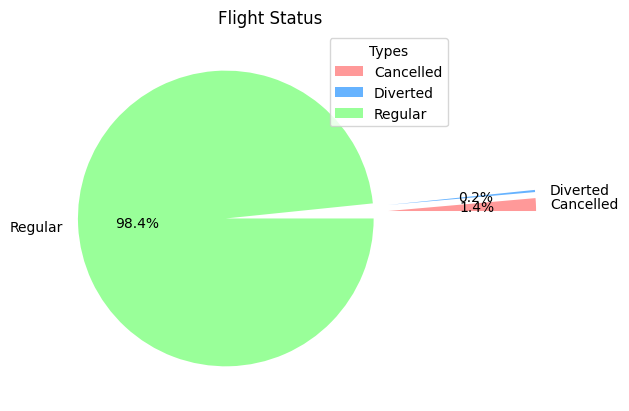

In [9]:
# Pie chart to plotting percentage of flights cancelled, diverted and rest of the flights

import matplotlib.pyplot as plt
from pyspark.sql.functions import sum
import pandas as pd

# Aggregate counts of different flight types
counts = origin_df.groupBy().agg(
    sum((origin_df.CANCELLED == 1.0).cast('int')).alias('cancelled'),
    sum((origin_df.DIVERTED == 1.0).cast('int')).alias('diverted'),
    sum(((origin_df.CANCELLED != 1.0) & (origin_df.DIVERTED != 1.0)).cast('int')).alias('regular')
).collect()[0]

# Convert counts to a Pandas DataFrame
labels = ['Cancelled', 'Diverted', 'Regular']
sizes = [counts.cancelled, counts.diverted, counts.regular]
df = pd.DataFrame({'Flight Type': labels, 'Count': sizes})

# Set color grading for each slice
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot the pie chart
explode = (0.8, 0.8, 0.3)
plt.pie(df['Count'], labels=df['Flight Type'], colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Flight Status')
plt.legend(title='Types', loc='upper right')
plt.show()

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
origin_df.select([count(when(col(c).isNull(), c)).alias(c) for c in origin_df.columns]).show()

+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|      0|         0|     0|   0|           0|  405071|   406913|           1|  437197|   496551|        0|       0|              25|             495595|  495595|       0|
+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+



In [10]:
# dropping rows with null values
origin_df = origin_df.dropna()

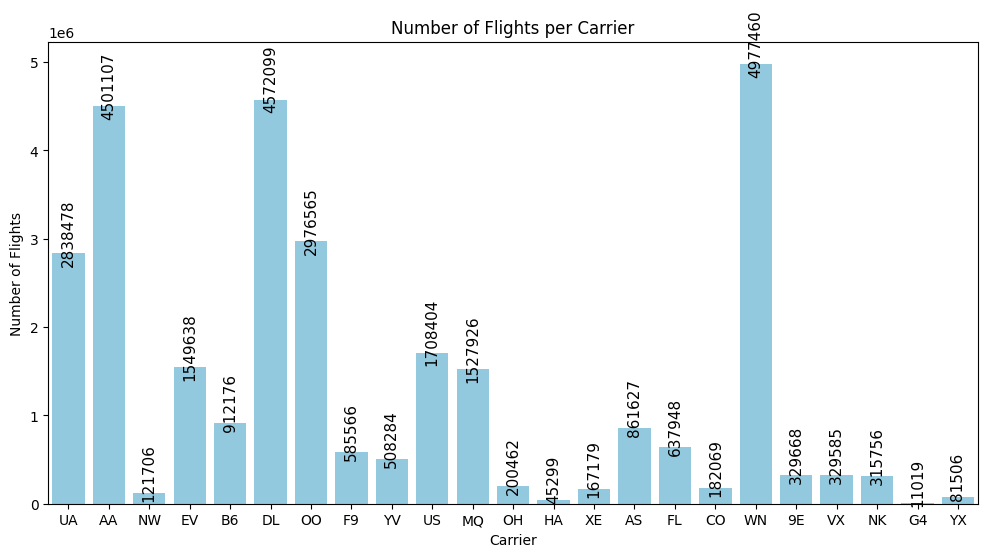

In [ ]:
# Bar plot to check number of flights by each carrier over the 10 years span from those 20 airports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql.functions import col

# create the DataFrame and calculate the flight count
flight_count = (origin_df.select('OP_CARRIER')
                   .groupBy('OP_CARRIER')
                   .agg({'OP_CARRIER': 'count'})
                   .withColumnRenamed('count(OP_CARRIER)', 'flight_count'))

# convert to Pandas DataFrame
flight_count_pd = flight_count.toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='OP_CARRIER', y='flight_count', data=flight_count_pd, color='skyblue')

# add the values at the top of each bar
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 15), textcoords='offset points', rotation=90)

# add labels and title
ax.set_xlabel('Carrier')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights per Carrier')

# display the plot
plt.show()

In [ ]:
# List of top 10 airlines with most number of flights from taken airports

from pyspark.sql.functions import desc

top_10_airlines = (flight_count
                   .orderBy(desc('flight_count'))
                   .limit(10))
top_10_airlines.show()

+----------+------------+
|OP_CARRIER|flight_count|
+----------+------------+
|        WN|     4977460|
|        DL|     4572099|
|        AA|     4501107|
|        OO|     2976565|
|        UA|     2838478|
|        US|     1708404|
|        EV|     1549638|
|        MQ|     1527926|
|        B6|      912176|
|        AS|      861627|
+----------+------------+



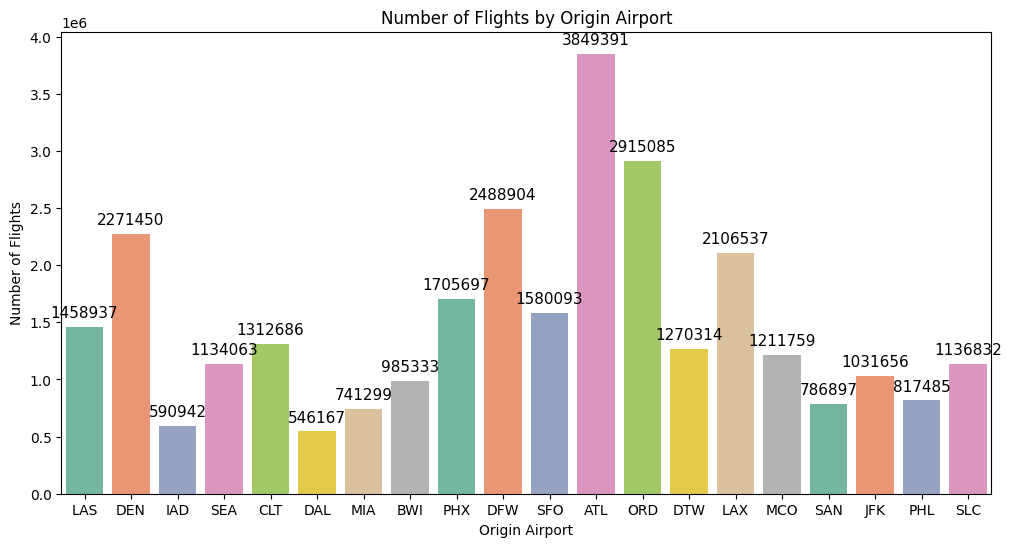

In [ ]:
# Bar plot to check number of flights from each airport over the 10 years span from those 20 airports

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col

# group by origin and count the number of flights
origin_count = (origin_df.groupby('ORIGIN')
                      .agg({'ORIGIN': 'count'})
                      .withColumnRenamed('count(ORIGIN)', 'flight_count'))

# convert to Pandas DataFrame
origin_count_pd = origin_count.toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='ORIGIN', y='flight_count', data=origin_count_pd, palette='Set2')

# add the values at the top of each bar
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# add labels and title
ax.set_xlabel('Origin Airport')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights by Origin Airport')

# display the plot
plt.show()

In [ ]:
# List of top 10 airlines with most number of flights among those 20 airports

top_10_airports= (origin_count
                   .orderBy(desc('flight_count'))
                   .limit(10))
top_10_airports.show()

+------+------------+
|ORIGIN|flight_count|
+------+------------+
|   ATL|     3849391|
|   ORD|     2915085|
|   DFW|     2488904|
|   DEN|     2271450|
|   LAX|     2106537|
|   PHX|     1705697|
|   SFO|     1580093|
|   LAS|     1458937|
|   CLT|     1312686|
|   DTW|     1270314|
+------+------------+



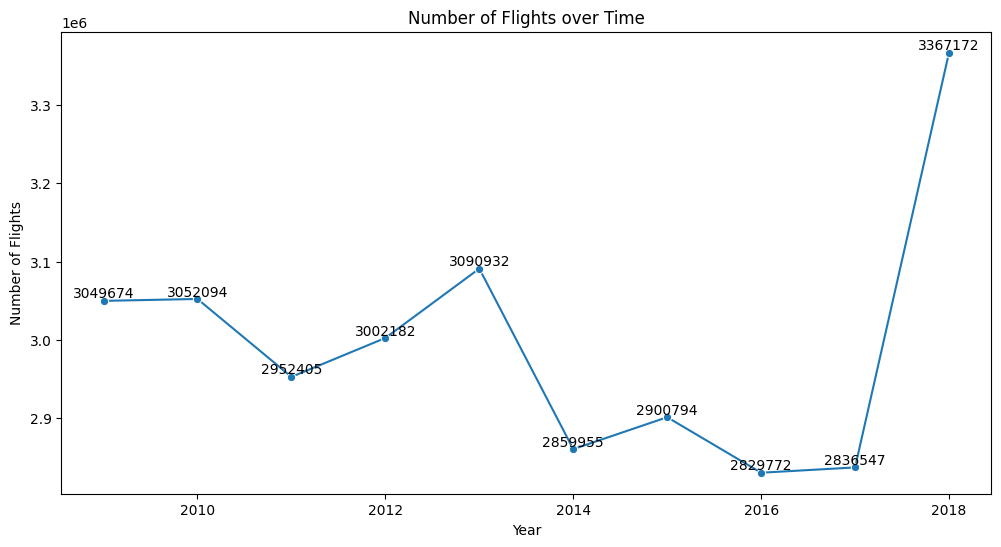

In [ ]:
# Line plot to check number of flights flown from those 20 airports over the years

from pyspark.sql.functions import year

# group flights by year
flight_count = origin_df.groupby(year('FL_DATE').alias('year')).count().toPandas()

# create the line plot
fig = plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=flight_count, marker='o')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Flights over Time')

# display the values at each year
for i, row in flight_count.iterrows():
    plt.text(row['year'], row['count'], row['count'], ha='center', va='bottom', fontsize=10)

# show the plot
plt.show()

In [ ]:
short_delays_count = origin_df.select().where((origin_df.DEP_DELAY <= 5.0) & (origin_df.DEP_DELAY >= -5.0)).count()
print(f'Count of the departure delays in the range of 5 minutes: {short_delays_count}')

Count of the departure delays in the range of 5 minutes: 16624061


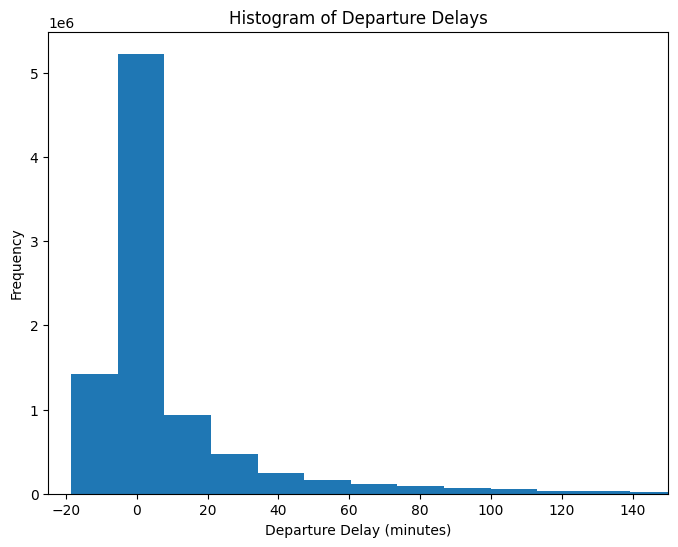

In [ ]:
# Histogram of departure delays departed from 20 airports taken

# Sample the PySpark DataFrame
dep_delay_df = origin_df.select(col('DEP_DELAY')).sample(fraction=0.3)

# Convert PySpark dataframe to Pandas dataframe
dep_delay_pd = dep_delay_df.toPandas()

# Create the histogram
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(dep_delay_pd, bins=200)

# Add labels and title
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Departure Delays')

ax.set_xlim([-25, 150])

# Show the plot
plt.show()

As we can see from the plot that most of the departure delays are within 5 minutes, so we can say that most of the departure delays are short delays

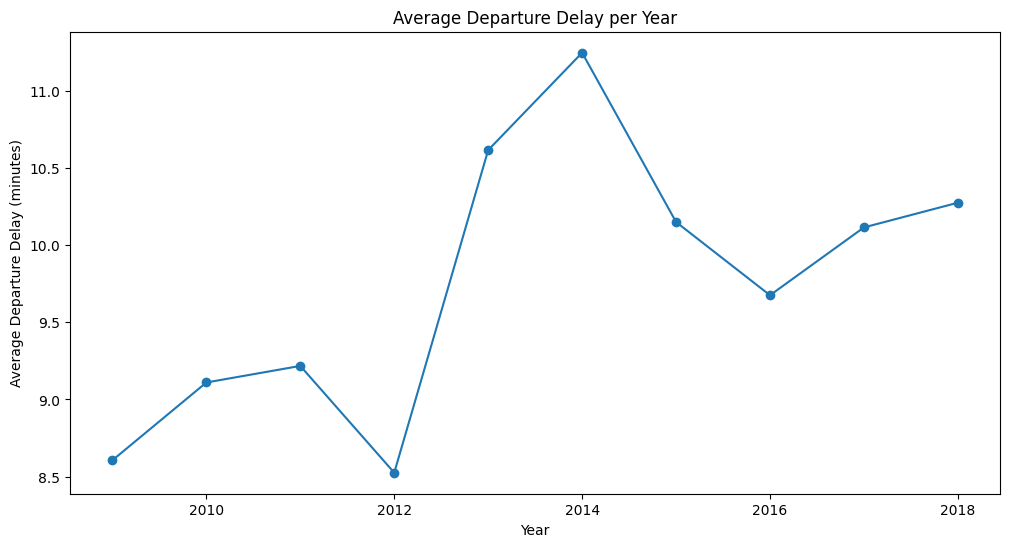

In [ ]:
# Line plot of the average departure delays over time

from pyspark.sql.functions import year

# group flights by year
delay_avg = origin_df.groupBy(year('FL_DATE').alias('year')) \
                  .agg({'DEP_DELAY': 'avg'}) \
                  .orderBy('year') \
                  .toPandas()

# create the line plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(delay_avg['year'], delay_avg['avg(DEP_DELAY)'], marker='o')

# add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay per Year')

# show the plot
plt.show()


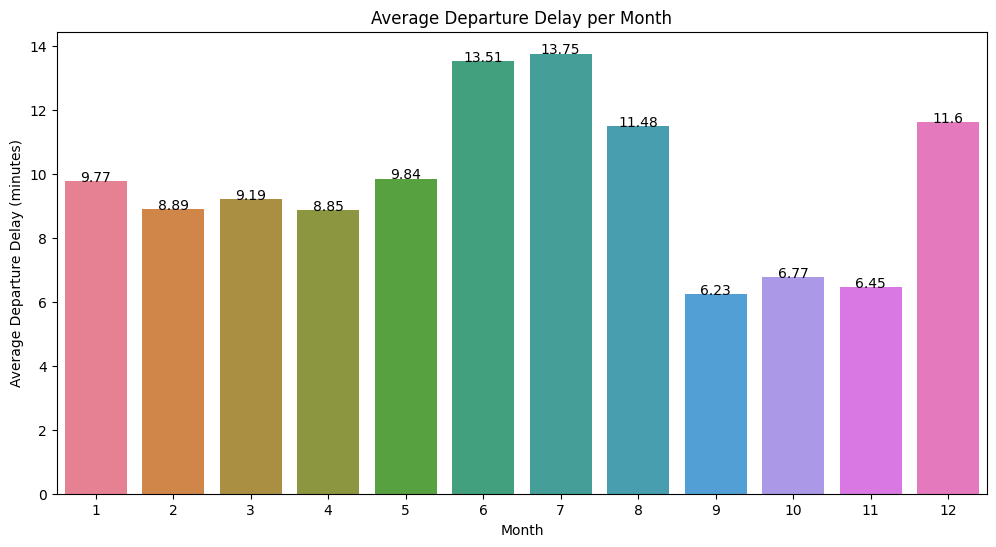

In [ ]:
# Bar graph for average departure delay for each month over 10 year period

from pyspark.sql.functions import month

# group flights by month
delay_avg = origin_df.groupBy(month('FL_DATE').alias('month')) \
                  .agg({'DEP_DELAY': 'avg'}) \
                  .orderBy('month') \
                  .toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='month', y='avg(DEP_DELAY)', data=delay_avg, palette = 'husl', ax=ax)

# add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay per Month')

# add annotations to the bars
for index, row in delay_avg.iterrows():
    ax.text(row.month-1, row['avg(DEP_DELAY)'], round(row['avg(DEP_DELAY)'], 2), 
            color='black', ha="center", fontsize=10)

# show the plot
plt.show()

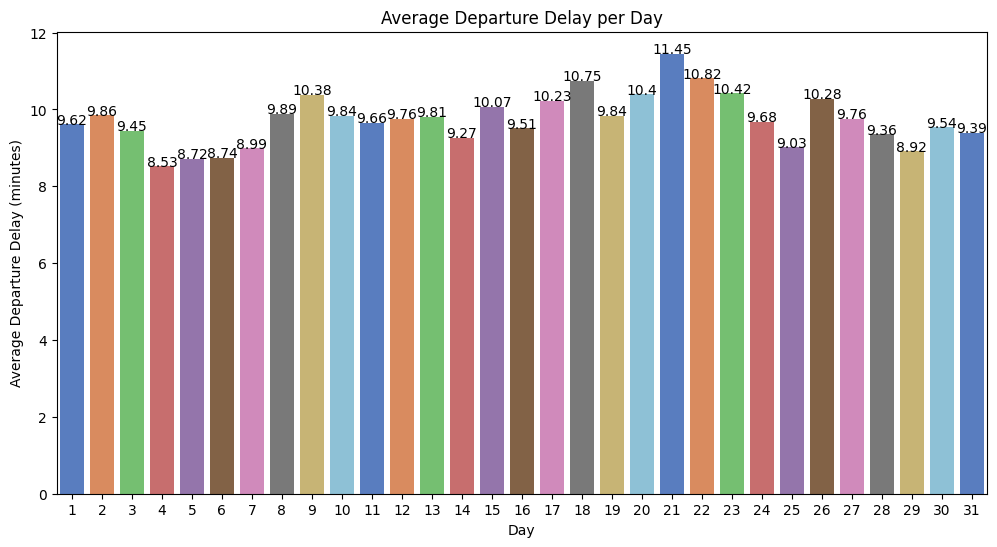

In [ ]:
# Bar graph for average departure delay for each day over 10 year period

from pyspark.sql.functions import dayofmonth

# group flights by day
delay_avg = origin_df.groupBy(dayofmonth('FL_DATE').alias('day')) \
                  .agg({'DEP_DELAY': 'avg'}) \
                  .orderBy('day') \
                  .toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='day', y='avg(DEP_DELAY)', data=delay_avg, palette = 'muted', ax=ax)

# add labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay per Day')

# add annotations to the bars
for index, row in delay_avg.iterrows():
    ax.text(row.day-1, row['avg(DEP_DELAY)'], round(row['avg(DEP_DELAY)'], 2), 
            color='black', ha="center", fontsize=10)

# show the plot
plt.show()


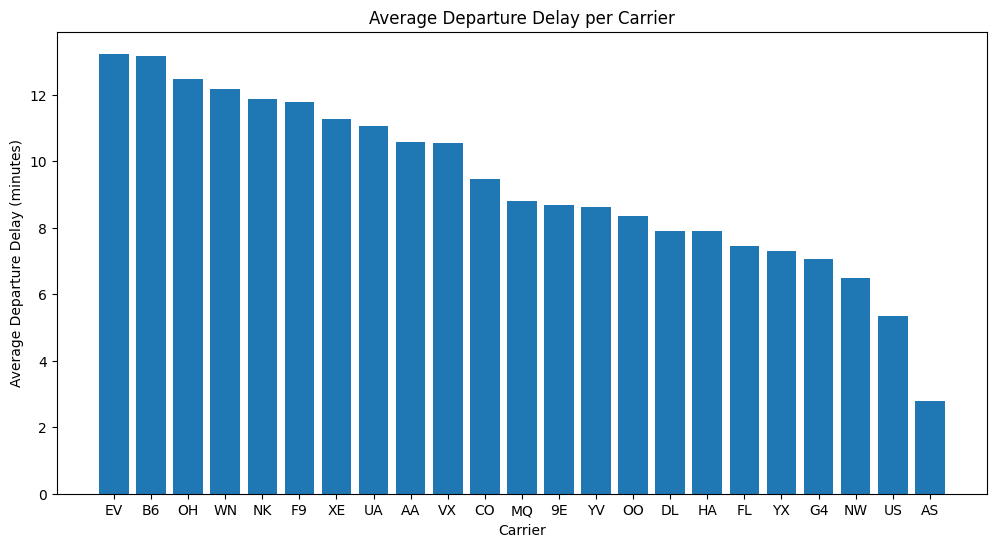

In [ ]:
# Average departure delay of each carrier in bar plot

from pyspark.sql.functions import col

# group flights by carrier
delay_avg = origin_df.groupBy('OP_CARRIER') \
                  .agg({'DEP_DELAY': 'avg'}) \
                  .orderBy(col('avg(DEP_DELAY)').desc()) \
                  .toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(delay_avg['OP_CARRIER'], delay_avg['avg(DEP_DELAY)'])

# add labels and title
ax.set_xlabel('Carrier')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay per Carrier')

# show the plot
plt.show()

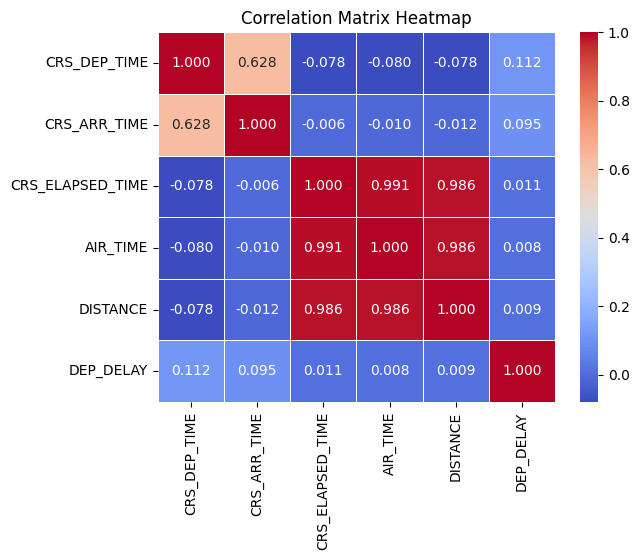

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# select the columns for correlation matrix
columns = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DEP_DELAY']

# create a correlation matrix
corr_matrix = origin_df.select(columns).toPandas().corr()

# create a heatmap using seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidth = 0.5)

# set the title of the plot
plt.title('Correlation Matrix Heatmap')

# show the plot
plt.show()

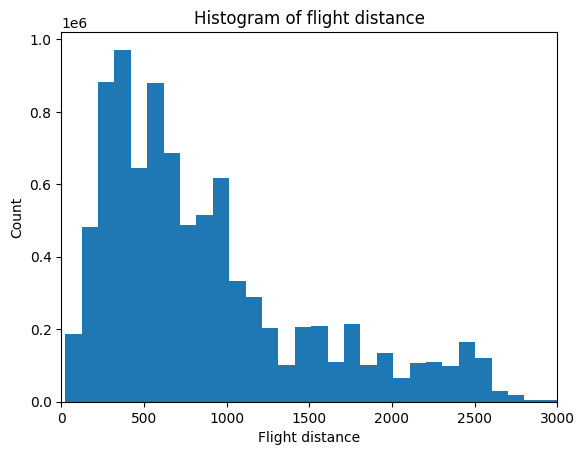

In [12]:
import matplotlib.pyplot as plt

# sample 40% of the data with a seed value
flights_sample = origin_df.select(col('DISTANCE')).sample(fraction=0.3)

# extract the DISTANCE column as a Pandas Series
distances = flights_sample.toPandas()['DISTANCE']

# plot histogram of flight distance
plt.hist(distances, bins=50)
plt.xlabel('Flight distance')
plt.ylabel('Count')
plt.title('Histogram of flight distance')
plt.xlim([0, 3000])

plt.show()

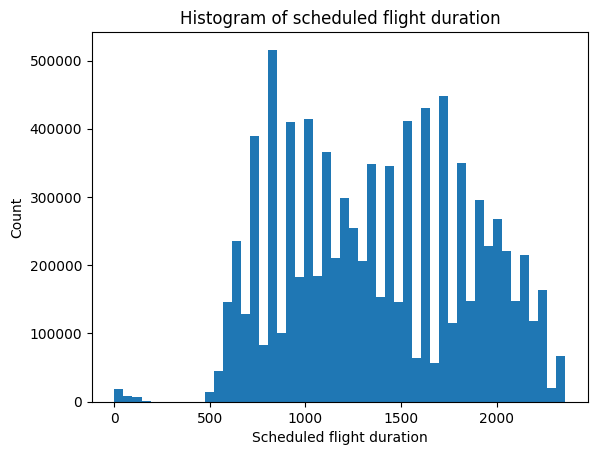

In [ ]:
import matplotlib.pyplot as plt

# sample 40% of the data with a seed value
flights_time = origin_df.select(col('CRS_DEP_TIME')).sample(fraction=0.3)

# extract the DISTANCE column as a Pandas Series
time = flights_time.toPandas()['CRS_DEP_TIME']

# plot histogram of flight distance
plt.hist(time, bins=50)
plt.xlabel('Scheduled flight duration')
plt.ylabel('Count')
plt.title('Histogram of scheduled flight duration')

plt.show()

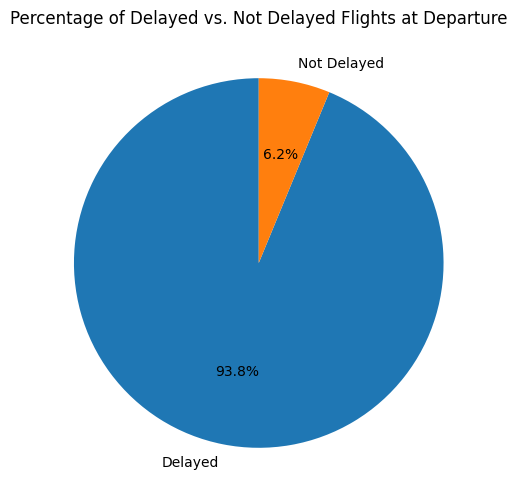

In [ ]:
# Pie chart for percentage of flights that are on-time vs delayed

delayed_count = origin_df.filter(origin_df.DEP_DELAY != 0).count()
not_delayed_count = origin_df.filter(origin_df.DEP_DELAY == 0).count()

delayed_percent = (delayed_count / (delayed_count + not_delayed_count)) * 100
not_delayed_percent = (not_delayed_count / (delayed_count + not_delayed_count)) * 100

# create a pie chart
fig, ax = plt.subplots(figsize=(6,6))

# plot the pie chart
ax.pie([delayed_percent, not_delayed_percent], labels=['Delayed', 'Not Delayed'], autopct='%1.1f%%', startangle=90)

# add title
ax.set_title('Percentage of Delayed vs. Not Delayed Flights at Departure')

# show the plot
plt.show()

In [13]:
from pyspark.sql.functions import when, col

origin_df = origin_df.withColumn('dep_delay_class', when(col('DEP_DELAY') == 0.0, 0).otherwise(1)) \
           .withColumn('arr_delay_class', when(col('ARR_DELAY') == 0.0, 0).otherwise(1))
origin_df.show(10)

+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+---------------+---------------+
|   FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|dep_delay_class|arr_delay_class|
+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+---------------+---------------+
|2009-01-01|        XE|   IAD| EWR|      1715.0|  1705.0|    -10.0|      1900.0|  1822.0|    -38.0|      0.0|     0.0|           105.0|               77.0|    40.0|   213.0|              1|              1|
|2009-01-01|        XE|   ATL| EWR|      1915.0|  1913.0|     -2.0|      2142.0|  2123.0|    -19.0|      0.0|     0.0|           147.0|              130.0|    96.0|   745.0|   

In [14]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.sql.functions import unix_timestamp

# convert date column to Unix timestamp in seconds
origin_df = origin_df.withColumn('FL_DATE_UNIX', unix_timestamp('FL_DATE'))


# create a single StringIndexer to encode multiple categorical columns
indexer = StringIndexer(inputCols=['OP_CARRIER', 'ORIGIN', 'DEST'], outputCols=['OP_CARRIER_index', 'ORIGIN_index', 'DEST_index'])

# create a VectorAssembler to combine input columns into a single vector column
assembler = VectorAssembler(inputCols=['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'OP_CARRIER_index', 'ORIGIN_index', 'DEST_index', 'FL_DATE_UNIX'], outputCol='features')

# fit the StringIndexer on the input data to generate the mapping
indexed_df = indexer.fit(origin_df).transform(origin_df)

# transform the input data to include the new features column
transformed_df = assembler.transform(indexed_df)

# Scale the features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(transformed_df)
scaled_df = scaler_model.transform(transformed_df)

# split the data into training and test sets
(train_data, test_data) = scaled_df.randomSplit([0.7, 0.3], seed=42)

# create a logistic regression model and fit it to the training data
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='dep_delay_class')
lr_model = lr.fit(train_data)

# make predictions on the test data using the fitted model
predictions = lr_model.transform(test_data)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# evaluate the model's performance using accuracy
evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="dep_delay_class", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)

# calculate precision, recall, and F1-score using the test data
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='dep_delay_class', metricName='weightedPrecision')
precision = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='dep_delay_class', metricName='weightedRecall')
recall = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='dep_delay_class', metricName='f1')
f1_score = evaluator.evaluate(predictions)


print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Accuracy:', accuracy)

Precision: 0.879036619530845
Recall: 0.9375695278382532
F1-score: 0.9073600785945333
Accuracy: 0.9375695278382532


In [41]:
# create a set of distinct airports from the dataframe
dest_airports = set(new_df.select("DEST").distinct().rdd.flatMap(lambda x: x).collect())

# find the missing airports
missing_airports = airports - dest_airports

print("Missing airports:", missing_airports)

Missing airports: set()


As we can see missing_airports is empty set which implies that all the airports from list created are present in the dataset

In [15]:
# Creating another dataframe where the destination column has only those 20 airports from airports list
dest_df = new_df.filter(col("DEST").isin(airports))
dest_df.show()

+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|   FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|2009-01-01|        XE|   EWR| IAD|      1510.0|  1509.0|     -1.0|      1632.0|  1624.0|     -8.0|      0.0|     0.0|            82.0|               75.0|    43.0|   213.0|
|2009-01-01|        XE|   CLE| ATL|      1645.0|  1637.0|     -8.0|      1842.0|  1825.0|    -17.0|      0.0|     0.0|           117.0|              108.0|    91.0|   554.0|
|2009-01-01|        XE|   EWR| ORD|      1000.0|  1035.0|     35.0|      1139.0|  1206.0|     27.0|      0.0|     0.0|           1

In [16]:
dest_df.describe().show()

+-------+----------+--------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+------------------+-------------------+------------------+-----------------+
|summary|OP_CARRIER|  ORIGIN|    DEST|      CRS_DEP_TIME|          DEP_TIME|         DEP_DELAY|      CRS_ARR_TIME|          ARR_TIME|        ARR_DELAY|           CANCELLED|            DIVERTED|  CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|
+-------+----------+--------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+------------------+-------------------+------------------+-----------------+
|  count|  30440387|30440387|30440387|          30440387|          30001171|          29999473|          30440386|          29978997|         29915846|            30440387|            304403

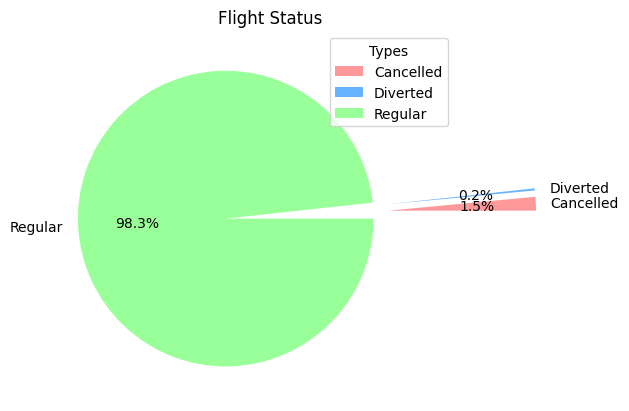

In [17]:
# Pie chart to plotting percentage of flights cancelled, diverted and rest of the flights that are arriving at those 20 airports

# Aggregate counts of different flight types
counts = dest_df.groupBy().agg(
    sum((dest_df.CANCELLED == 1.0).cast('int')).alias('cancelled'),
    sum((dest_df.DIVERTED == 1.0).cast('int')).alias('diverted'),
    sum(((dest_df.CANCELLED != 1.0) & (dest_df.DIVERTED != 1.0)).cast('int')).alias('regular')
).collect()[0]

# Convert counts to a Pandas DataFrame
labels = ['Cancelled', 'Diverted', 'Regular']
sizes = [counts.cancelled, counts.diverted, counts.regular]
df = pd.DataFrame({'Flight Type': labels, 'Count': sizes})

# Set color grading for each slice
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot the pie chart
explode = (0.8, 0.8, 0.3)
plt.pie(df['Count'], labels=df['Flight Type'], colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Flight Status')
plt.legend(title='Types', loc='upper right')
plt.show()

In [18]:
# checking null values in each columns

from pyspark.sql.functions import isnan, when, count, col
dest_df.select([count(when(col(c).isNull(), c)).alias(c) for c in dest_df.columns]).show()

+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|      0|         0|     0|   0|           0|  439216|   440914|           1|  461390|   524541|        0|       0|              25|             523666|  523665|       0|
+-------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+



In [19]:
# dropping rows with null values
dest_df = dest_df.dropna()

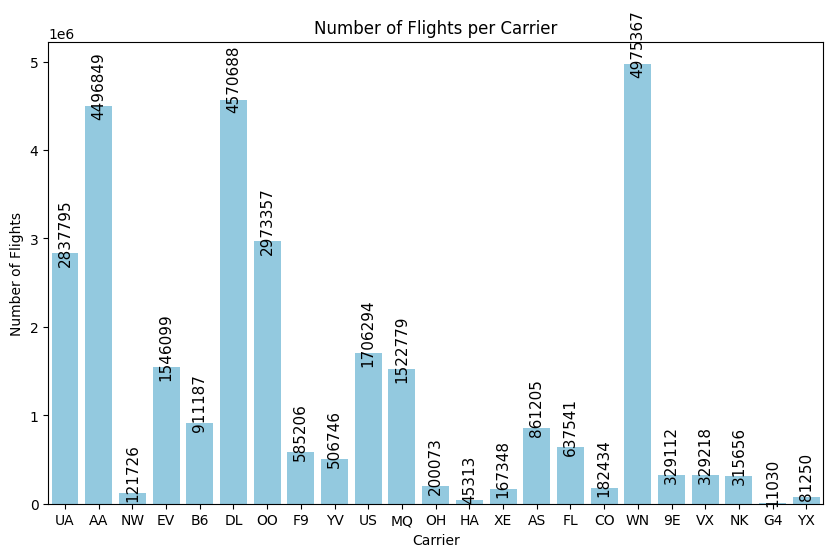

In [20]:
# Bar plot to check number of flights by each carrier over the 10 years span to those those 20 airports

# create the DataFrame and calculate the flight count
flight_count = (dest_df.select('OP_CARRIER')
                   .groupBy('OP_CARRIER')
                   .agg({'OP_CARRIER': 'count'})
                   .withColumnRenamed('count(OP_CARRIER)', 'flight_count'))

# convert to Pandas DataFrame
flight_count_pd = flight_count.toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='OP_CARRIER', y='flight_count', data=flight_count_pd, color='skyblue')

# add the values at the top of each bar
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 15), textcoords='offset points', rotation=90)

# add labels and title
ax.set_xlabel('Carrier')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights per Carrier')

# display the plot
plt.show()

In [22]:
# List of top 10 airlines with most number of flights to the 20 airports
from pyspark.sql.functions import desc

top_10_airlines = (flight_count
                   .orderBy(desc('flight_count'))
                   .limit(10))
top_10_airlines.show()

+----------+------------+
|OP_CARRIER|flight_count|
+----------+------------+
|        WN|     4975367|
|        DL|     4570688|
|        AA|     4496849|
|        OO|     2973357|
|        UA|     2837795|
|        US|     1706294|
|        EV|     1546099|
|        MQ|     1522779|
|        B6|      911187|
|        AS|      861205|
+----------+------------+



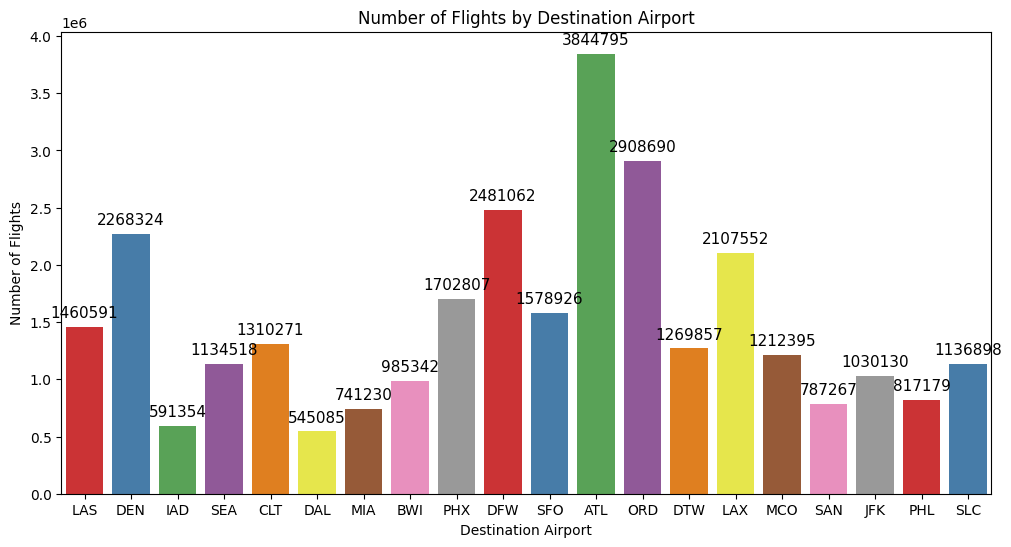

In [23]:
# Bar plot to check number of flights to each airport over the 10 years span from those 20 airports

# group by destination and count the number of flights
dest_count = (dest_df.groupby('DEST')
                      .agg({'DEST': 'count'})
                      .withColumnRenamed('count(DEST)', 'flight_count'))

# convert to Pandas DataFrame
dest_count_pd = dest_count.toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='DEST', y='flight_count', data=dest_count_pd, palette='Set1')

# add the values at the top of each bar
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# add labels and title
ax.set_xlabel('Destination Airport')
ax.set_ylabel('Number of Flights')
ax.set_title('Number of Flights by Destination Airport')

# display the plot
plt.show()

In [24]:
# List of top 10 airlines with most number of flights among those 20 airports

top_10_airports= (dest_count
                   .orderBy(desc('flight_count'))
                   .limit(10))
top_10_airports.show()

+----+------------+
|DEST|flight_count|
+----+------------+
| ATL|     3844795|
| ORD|     2908690|
| DFW|     2481062|
| DEN|     2268324|
| LAX|     2107552|
| PHX|     1702807|
| SFO|     1578926|
| LAS|     1460591|
| CLT|     1310271|
| DTW|     1269857|
+----+------------+



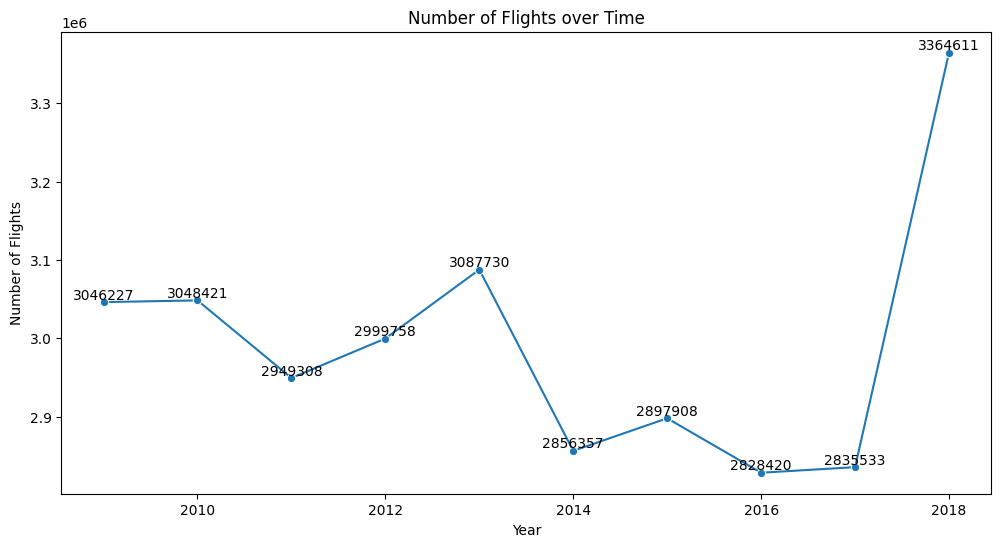

In [25]:
# Line plot to check number of flights flown to those 20 airports over the years
from pyspark.sql.functions import year

# group flights by year
flight_count = dest_df.groupby(year('FL_DATE').alias('year')).count().toPandas()

# create the line plot
fig = plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=flight_count, marker='o')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Flights over Time')

# display the values at each year
for i, row in flight_count.iterrows():
    plt.text(row['year'], row['count'], row['count'], ha='center', va='bottom', fontsize=10)

# show the plot
plt.show()

In [27]:
short_delays = dest_df.select().where((dest_df.ARR_DELAY <= 5.0) & (dest_df.ARR_DELAY >= -5.0)).count()
print(f'Count of the departure delays in the range of 5 minutes: {short_delays}')

Count of the departure delays in the range of 5 minutes: 7030784


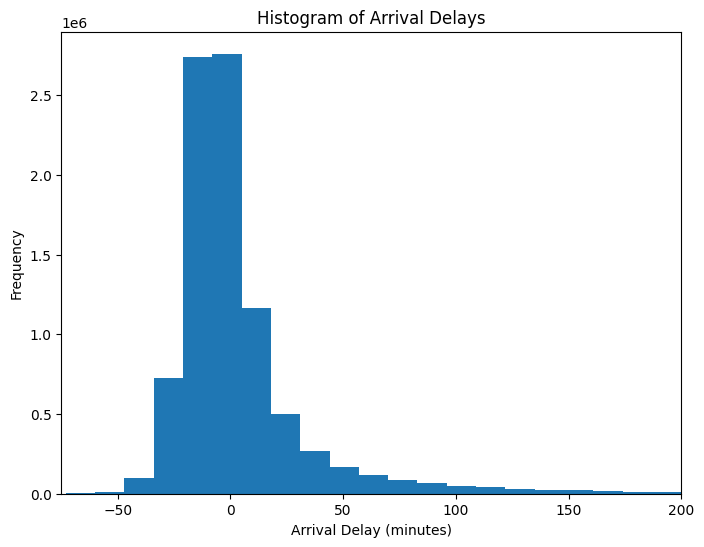

In [28]:
# Histogram of arrival delays arrived at those 20 airports taken

# Filter new_df to only include DEP_DELAY column
dep_delay_df = dest_df.select(col('ARR_DELAY')).sample(fraction=0.3)

# Convert PySpark dataframe to Pandas dataframe
dep_delay_pd = dep_delay_df.toPandas()

# Create the histogram
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(dep_delay_pd, bins=200)

# Add labels and title
ax.set_xlabel('Arrival Delay (minutes)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Arrival Delays')

ax.set_xlim([-75, 200])

# Show the plot
plt.show()


As we can see from the plot that most of the departure delays are within 5 minutes, so we can say that most of the arrival delays are short delays as well

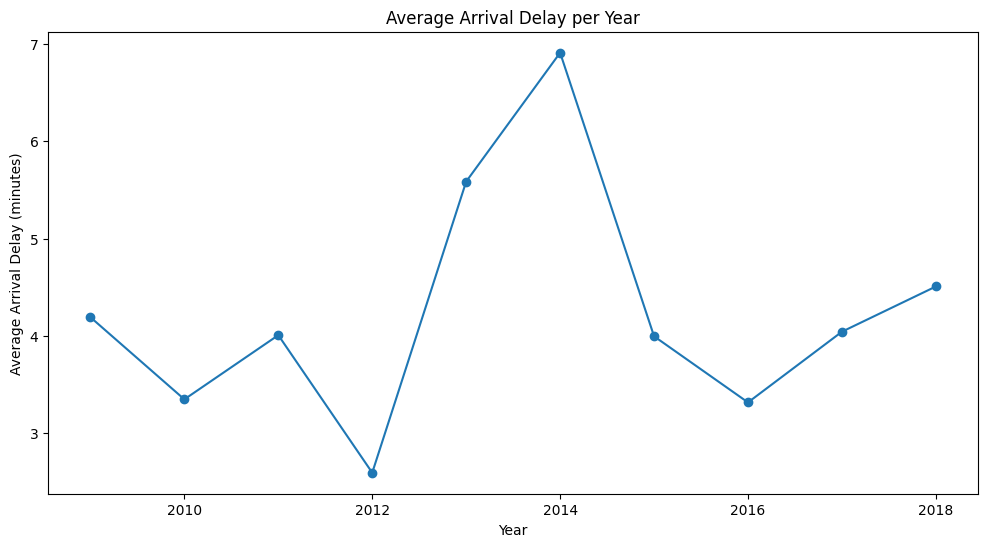

In [29]:
# Line plot of the average arrival delay over time

# group flights by year
delay_avg = dest_df.groupBy(year('FL_DATE').alias('year')) \
                  .agg({'ARR_DELAY': 'avg'}) \
                  .orderBy('year') \
                  .toPandas()

# create the line plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(delay_avg['year'], delay_avg['avg(ARR_DELAY)'], marker='o')

# add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Arrival Delay (minutes)')
ax.set_title('Average Arrival Delay per Year')

# show the plot
plt.show()


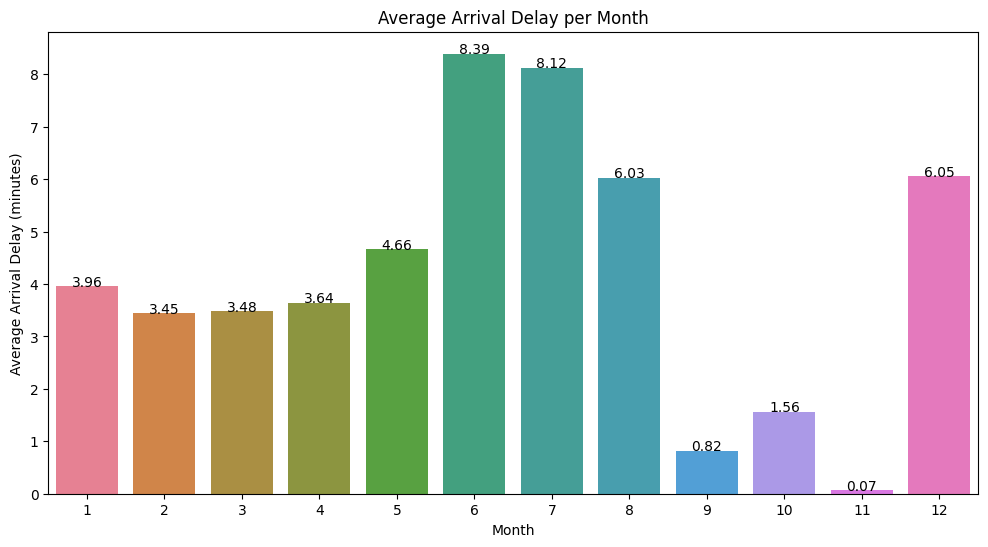

In [30]:
# Bar graph for average arrival delay for each month over 10 year period
from pyspark.sql.functions import month

# group flights by month
delay_avg = dest_df.groupBy(month('FL_DATE').alias('month')) \
                  .agg({'ARR_DELAY': 'avg'}) \
                  .orderBy('month') \
                  .toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='month', y='avg(ARR_DELAY)', data=delay_avg, palette = 'husl', ax=ax)

# add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Average Arrival Delay (minutes)')
ax.set_title('Average Arrival Delay per Month')

# add annotations to the bars
for index, row in delay_avg.iterrows():
    ax.text(row.month-1, row['avg(ARR_DELAY)'], round(row['avg(ARR_DELAY)'], 2), 
            color='black', ha="center", fontsize=10)

# show the plot
plt.show()



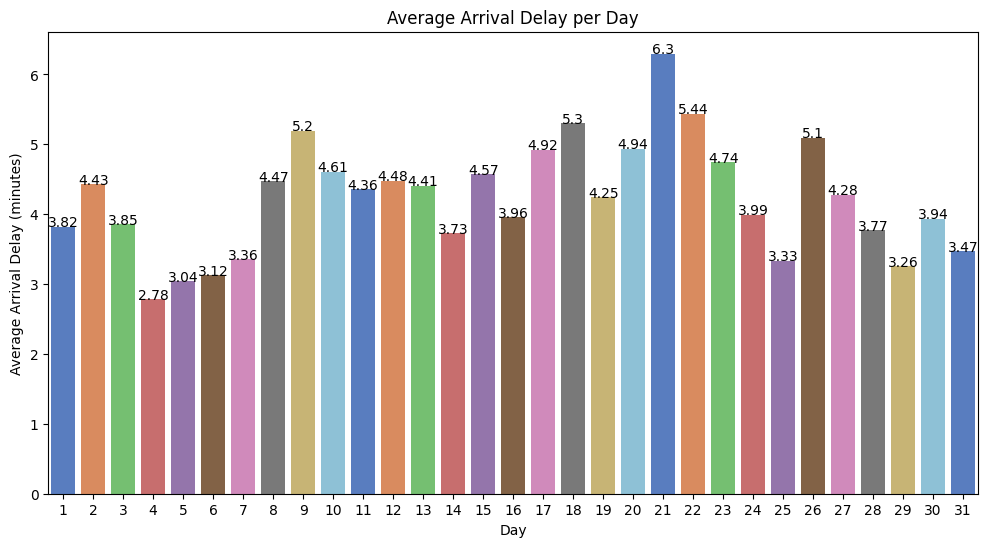

In [32]:
# Bar graph for average arrival delay for each day over 10 year period
from pyspark.sql.functions import dayofmonth

# group flights by day
delay_avg = dest_df.groupBy(dayofmonth('FL_DATE').alias('day')) \
                  .agg({'ARR_DELAY': 'avg'}) \
                  .orderBy('day') \
                  .toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='day', y='avg(ARR_DELAY)', data=delay_avg, palette = 'muted', ax=ax)

# add labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Average Arrival Delay (minutes)')
ax.set_title('Average Arrival Delay per Day')

# add annotations to the bars
for index, row in delay_avg.iterrows():
    ax.text(row.day-1, row['avg(ARR_DELAY)'], round(row['avg(ARR_DELAY)'], 2), 
            color='black', ha="center", fontsize=10)

# show the plot
plt.show()


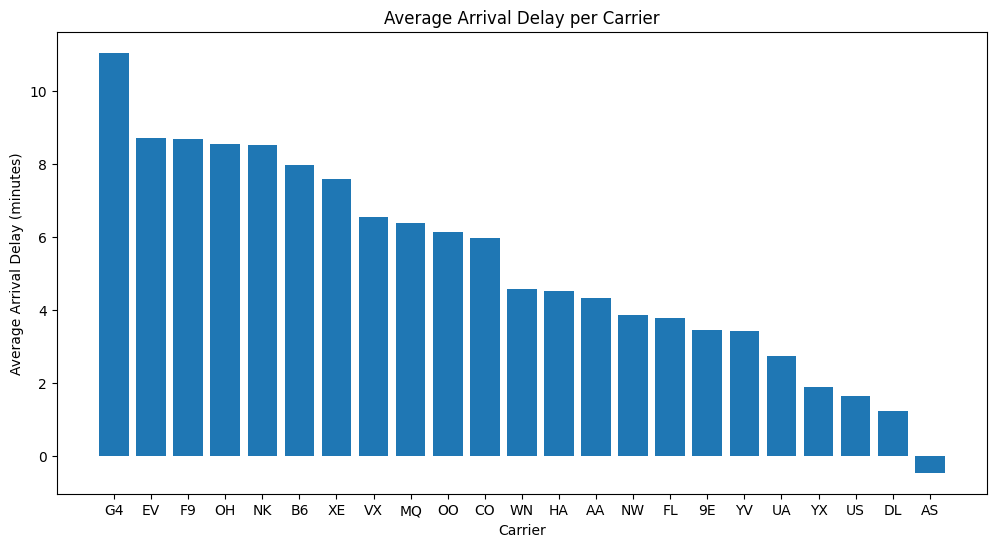

In [33]:
# Average arrival delay of each carrier in bar plot

# group flights by carrier
delay_avg = dest_df.groupBy('OP_CARRIER') \
                  .agg({'ARR_DELAY': 'avg'}) \
                  .orderBy(col('avg(ARR_DELAY)').desc()) \
                  .toPandas()

# create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(delay_avg['OP_CARRIER'], delay_avg['avg(ARR_DELAY)'])

# add labels and title
ax.set_xlabel('Carrier')
ax.set_ylabel('Average Arrival Delay (minutes)')
ax.set_title('Average Arrival Delay per Carrier')

# show the plot
plt.show()

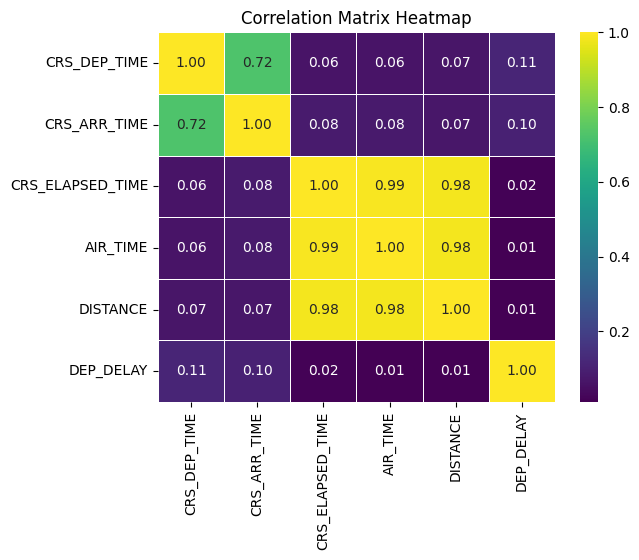

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# select the columns for correlation matrix
columns = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DEP_DELAY']

# create a correlation matrix
corr_matrix = dest_df.select(columns).toPandas().corr()

# create a heatmap using seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidth = 0.5)

# set the title of the plot
plt.title('Correlation Matrix Heatmap')

# show the plot
plt.show()

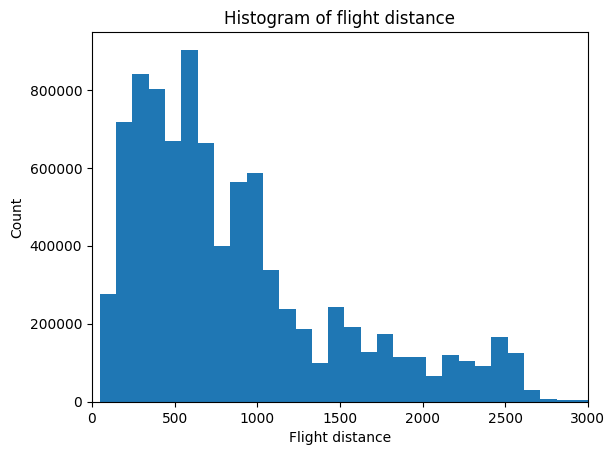

In [39]:
import matplotlib.pyplot as plt

# sample 30% of the data with a seed value
flights_sample = dest_df.select(col('DISTANCE')).sample(fraction=0.3)

# extract the DISTANCE column as a Pandas Series
distances = flights_sample.toPandas()['DISTANCE']

# plot histogram of flight distance
plt.hist(distances, bins=50)
plt.xlabel('Flight distance')
plt.ylabel('Count')
plt.title('Histogram of flight distance')
plt.xlim([0, 3000])

plt.show()


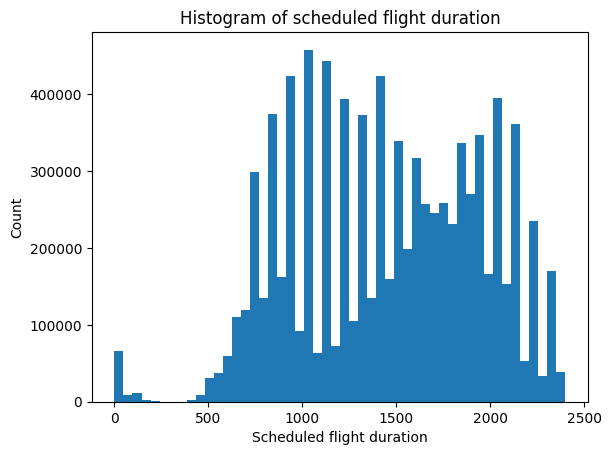

In [36]:
import matplotlib.pyplot as plt

# sample 30% of the data with a seed value
flights_time = dest_df.select(col('CRS_ARR_TIME')).sample(fraction=0.3)

# extract the DISTANCE column as a Pandas Series
time = flights_time.toPandas()['CRS_ARR_TIME']

# plot histogram of flight distance
plt.hist(time, bins=50)
plt.xlabel('Scheduled flight duration')
plt.ylabel('Count')
plt.title('Histogram of scheduled flight duration')

plt.show()

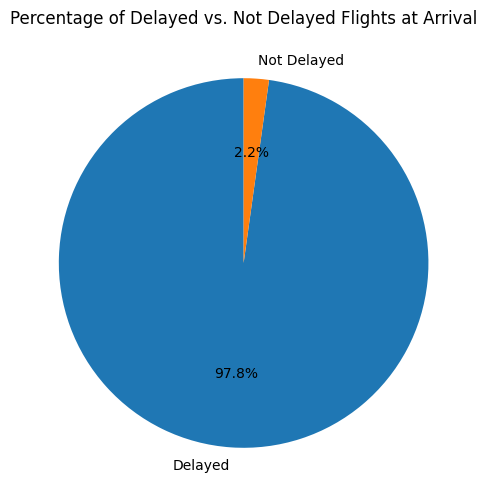

In [37]:
# Pie chart for percentage of flights that are on-time vs delayed at arrival

delayed_count = dest_df.filter(dest_df.ARR_DELAY != 0).count()
not_delayed_count = dest_df.filter(dest_df.ARR_DELAY == 0).count()

delayed_percent = (delayed_count / (delayed_count + not_delayed_count)) * 100
not_delayed_percent = (not_delayed_count / (delayed_count + not_delayed_count)) * 100

# create a pie chart
fig, ax = plt.subplots(figsize=(6,6))

# plot the pie chart
ax.pie([delayed_percent, not_delayed_percent], labels=['Delayed', 'Not Delayed'], autopct='%1.1f%%', startangle=90)

# add title
ax.set_title('Percentage of Delayed vs. Not Delayed Flights at Arrival')

# show the plot
plt.show()

In [38]:
from pyspark.sql.functions import when, col

dest_df = dest_df.withColumn('dep_delay_class', when(col('DEP_DELAY') == 0.0, 0).otherwise(1)) \
           .withColumn('arr_delay_class', when(col('ARR_DELAY') == 0.0, 0).otherwise(1))
dest_df.show(10)

+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+---------------+---------------+
|   FL_DATE|OP_CARRIER|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|dep_delay_class|arr_delay_class|
+----------+----------+------+----+------------+--------+---------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+---------------+---------------+
|2009-01-01|        XE|   EWR| IAD|      1510.0|  1509.0|     -1.0|      1632.0|  1624.0|     -8.0|      0.0|     0.0|            82.0|               75.0|    43.0|   213.0|              1|              1|
|2009-01-01|        XE|   CLE| ATL|      1645.0|  1637.0|     -8.0|      1842.0|  1825.0|    -17.0|      0.0|     0.0|           117.0|              108.0|    91.0|   554.0|   

In [40]:

# convert date column to Unix timestamp in seconds
dest_df = dest_df.withColumn('FL_DATE_UNIX', unix_timestamp('FL_DATE'))


# create a single StringIndexer to encode multiple categorical columns
indexer = StringIndexer(inputCols=['OP_CARRIER', 'ORIGIN', 'DEST'], outputCols=['OP_CARRIER_index', 'ORIGIN_index', 'DEST_index'])

# create a VectorAssembler to combine input columns into a single vector column
assembler = VectorAssembler(inputCols=['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'OP_CARRIER_index', 'ORIGIN_index', 'DEST_index'], outputCol='features')

# fit the StringIndexer on the input data to generate the mapping
indexed_df = indexer.fit(dest_df).transform(dest_df)

# transform the input data to include the new features column
transformed_df = assembler.transform(indexed_df)

# Scale the features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(transformed_df)
scaled_df = scaler_model.transform(transformed_df)

# split the data into training and test sets
(train_data, test_data) = scaled_df.randomSplit([0.7, 0.3], seed=42)

# create a logistic regression model and fit it to the training data
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='arr_delay_class')
lr_model = lr.fit(train_data)

# make predictions on the test data using the fitted model
predictions = lr_model.transform(test_data)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# evaluate the model's performance using accuracy
evaluator_acc = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="arr_delay_class", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)

# calculate precision, recall, and F1-score using the test data
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='arr_delay_class', metricName='weightedPrecision')
precision = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='arr_delay_class', metricName='weightedRecall')
recall = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='arr_delay_class', metricName='f1')
f1_score = evaluator.evaluate(predictions)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Accuracy:', accuracy)

Precision: 0.9563585645720669
Recall: 0.9779358693554844
F1-score: 0.9670268681498747
Accuracy: 0.9779358693554844
